# Project 1
### Divina M Arpino - 10/18/2023
## Directions:
### This is the second part of Project #1.
Objective: 
Using Python, what insights can be drawn from the Course Survey data to help increase the number of students (any group) taking computing classes?

Start with your cleaned data from the previous Data Cleaning exercise. Then, document in a Jupyter Notebook four findings that can help guide the recruiting or messaging efforts. Documentation should include codes, plots, and comments (using Markdown cells). Code output and plots should clearly show your findings.

Questions to consider:
These are just some questions to consider. Feel free to explore the data in any avenue to come up with your four insights. There is a lot of rich data in these survey results, which could be analyzed in many ways. In your analysis, be sure to focus on the problem, which is to learn from these students to know what brought them to the course, so that we can attract others and learn from the non-majors why and what their interests are in computing.

- Are there groups of students who express an interest in another computing class? If so, who are they? How can they be categorized?
- What are the best methods for reaching out to students? How did most students hear about a computing class?
- What can you learn from the non-majors taking the computing entry-level classes (CMPs 128, 120, 239, etc.)?
- What can you learn from the students in the computer literacy courses and what are the interests they may or may not have in computing?


Submit: 
- A link to your GitHub repository that contains:
- Jupyter Notebook showing your explorations and conclusions:
        - Markdown cells should be used to describe the problem and organize and explain your notebook.
        - Python code must be commented.

In [93]:
#import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

## Read datasets from survey csv files

In [94]:
#read survey csv files / store in working dataframes
datafile_techies = "input/CCM Computing Entry Survey - Fall 2022.csv"
datafile_literacy = "input/CCM Computing Literacy Course Entry Survey - Fall 2022.csv"
df_techies = pd.read_csv(datafile_techies)
df_literacy = pd.read_csv(datafile_literacy)

## Explore the Datasets

### Computing Entry Survey (techies)
#### Check structure of techies dataframe to familiarize with data and layout

In [95]:
df_techies.head()

,Timestamp,Which course are you enrolled in?,How did you hear about County College of Morris? [CCM Web site],How did you hear about County College of Morris? [Social Media],How did you hear about County College of Morris? [Community Event],How did you hear about County College of Morris? [Family member or friend],How did you hear about County College of Morris? [Current CCM student],How did you hear about County College of Morris? [CCM Alumni],How did you hear about County College of Morris? [High School Teacher],How did you hear about County College of Morris? [High School Counselor],...,Did you receive information about the CCM computing programs from any of the following sources? [Employer],Did you receive information about the CCM computing programs from any of the following sources? [CCM Workforce Development],Did you receive information about the CCM computing programs from any of the following sources? [NJ Workforce Development Program],Did you receive information about the CCM computing programs from any of the following sources? [Other],"Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.","On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?",Please explain your answer to the question above. Why or why not would you be interested in taking another computing class?,Gender,Race/ethnicity,Age
0,2022/09/26 1:13:34 PM AST,CMP 128 Computer Science I,Yes,Yes,Yes,Yes,No,No,Yes,Yes,...,No,No,No,No,First Choice,NaN,NaN,Man,White/Caucasian,19-20
1,2022/09/26 2:36:22 PM AST,NaN,No,No,No,No,Yes,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,White/Caucasian,25-34
2,2022/09/26 2:37:38 PM AST,CMP 128 Computer Science I,No,No,No,No,No,No,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,1.0,Im really only taking this class for the requi...,Woman,White/Caucasian,19-20
3,2022/09/26 2:39:43 PM AST,CMP 128 Computer Science I,No,No,Yes,No,Yes,No,No,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Asian,18 and younger
4,2022/09/26 2:40:07 PM AST,CMP 128 Computer Science I,Yes,No,No,Yes,No,No,Yes,No,...,No,No,No,No,First Choice,NaN,NaN,Man,White/Caucasian,25-34


In [96]:
df_techies.shape

(374, 92)

In [97]:
df_techies.count

<bound method DataFrame.count of                       Timestamp   Which course are you enrolled in?  \
0     2022/09/26 1:13:34 PM AST          CMP 128 Computer Science I   
1     2022/09/26 2:36:22 PM AST                                 NaN   
2     2022/09/26 2:37:38 PM AST          CMP 128 Computer Science I   
3     2022/09/26 2:39:43 PM AST          CMP 128 Computer Science I   
4     2022/09/26 2:40:07 PM AST          CMP 128 Computer Science I   
..                          ...                                 ...   
369   2023/09/15 8:59:37 AM AST  CMP 239 Internet & Web Page Design   
370  2023/09/15 12:40:14 PM AST          CMP 128 Computer Science I   
371   2023/09/15 2:21:30 PM AST  CMP 239 Internet & Web Page Design   
372   2023/09/15 2:22:05 PM AST  CMP 239 Internet & Web Page Design   
373  2023/09/15 11:36:48 PM AST          CMP 128 Computer Science I   

    How did you hear about County College of Morris? [CCM Web site]  \
0                                          

In [98]:
df_techies.columns

Index(['Timestamp', 'Which course are you enrolled in?',
       'How did you hear about County College of Morris? [CCM Web site]',
       'How did you hear about County College of Morris? [Social Media]',
       'How did you hear about County College of Morris? [Community Event]',
       'How did you hear about County College of Morris? [Family member or friend]',
       'How did you hear about County College of Morris? [Current CCM student]',
       'How did you hear about County College of Morris? [CCM Alumni]',
       'How did you hear about County College of Morris? [High School Teacher]',
       'How did you hear about County College of Morris? [High School Counselor]',
       'How did you hear about County College of Morris? [In-app advertisement]',
       'How did you hear about County College of Morris? [Employer]',
       'How did you hear about County College of Morris? [Billboard]',
       'How did you hear about County College of Morris? [Television]',
       'How did you h

### In this section we explore the responder's interest to taking additional classes and reasons why they may/not be interested

In [99]:
# explore columns, select subset, rename, dropNA to try to get usable data for questions of interest
# here we are learning why responders are/not interested in taking additional classes in the field
df_techies1 = df_techies[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?','Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?']].dropna()
df_techies1.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?' : 'Interest', 'Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?': 'Why?'}, inplace=True)
df_techies1


,Interest,Why?
2,1.0,Im really only taking this class for the requi...
7,4.0,To further my knowledge of computing.
11,1.0,Computer Science isn't really for me but it he...
12,2.0,I'm taking this course because I need it to gr...
13,2.0,I am more interested in doing law in the long ...
...,...,...
348,4.0,I am pursuing a career in data science so I am...
350,5.0,Computing is applicable in every carrear.
359,3.0,I would like to be well acquainted with comput...
366,5.0,I would be interested in taking another comput...


In [100]:
# Look at reasons given by students with highest interest responses (5) only
# Here we are isolation the high interest responses to see what is driving these responders 
#    to take additional classes. 
#    - This allows for quick spotting of some commonalities and interests.
#    - We can spot some selling points / marketing tactics, s.a. application to engieering and 
#      other careers
#    - We can also note some specific comments, like coding in C++, which at the time may/not 
#      be part of our offerings
# Note: We can do a similar check on the least interested responses.

new_techies_df = df_techies1[(df_techies1['Interest']== 5.0)]
new_dfCounts = new_techies_df.drop('Interest', axis=1)
new_dfCounts


,Why?
14,To further my studies in Computer Science and ...
32,.
40,My personal interest in acquiring more SKILLS ...
118,It's a career that I study when I just graduat...
126,Professor is very good.
148,I would be interesting to start another class ...
158,I would be interested in taking more computing...
166,I am a computer engineering major so naturally...
172,I want to switch my major to computer science ...
217,I want to do more coding but with C++


In [101]:
#Save dataset to CSV - this can be sent for review to marketing, etc.
new_dfCounts.to_csv('output/EntrySurvey_ReasonsForInterest.csv')

### In this next section we explore whether race/ethnicity, age, and gender play influence interest responses on the Entry survey

In [102]:
#Add Gender and Race/Ethnicity to previous highest responses data for further analysis
df_techies2 = df_techies[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?','Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?', 'Gender', 'Race/ethnicity','Age ']].dropna()
df_techies2.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?' : 'Interest', 'Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?': 'Why?', 'Age ' : 'Age'}, inplace=True)
df_techies2 = df_techies2[(df_techies2['Interest']== 5.0)]
df_techies2

,Interest,Why?,Gender,Race/ethnicity,Age
14,5.0,To further my studies in Computer Science and ...,Man,White/Caucasian,19-20
32,5.0,.,I do not identify,Asian,65+
40,5.0,My personal interest in acquiring more SKILLS ...,Man,Hispanic or Latino,21-24
118,5.0,It's a career that I study when I just graduat...,Man,Hispanic or Latino,35-64
126,5.0,Professor is very good.,Man,Choose not to reply,35-64
148,5.0,I would be interesting to start another class ...,Man,White/Caucasian,19-20
158,5.0,I would be interested in taking more computing...,Man,White/Caucasian,19-20
166,5.0,I am a computer engineering major so naturally...,Man,Hispanic or Latino,21-24
172,5.0,I want to switch my major to computer science ...,Man,White/Caucasian,25-34
217,5.0,I want to do more coding but with C++,Man,White/Caucasian,25-34


### Literacy Entry Survey (literacy)
#### Check structure of techies dataframe to familiarize with data and layout

In [103]:
df_literacy.head()

,Timestamp,Which course are you currently enrolled in?,How did you hear about County College of Morris? [CCM Web site],How did you hear about County College of Morris? [Social Media],How did you hear about County College of Morris? [Community Event],How did you hear about County College of Morris? [Family member or friend],How did you hear about County College of Morris? [Current CCM student],How did you hear about County College of Morris? [CCM Alumni],How did you hear about County College of Morris? [High School Teacher],How did you hear about County College of Morris? [High School Counselor],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
0,2022/09/30 12:06:53 PM AST,CMP 101 Computer Information Literacy,No,No,No,Yes,No,No,No,Yes,...,Yes,Yes,No,No,Yes,No,No,Woman,Hispanic or Latino,18 and younger
1,2022/09/30 12:08:58 PM AST,CMP 135 Computer Concepts with Applications,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,21-24
2,2022/09/30 12:14:01 PM AST,CMP 135 Computer Concepts with Applications,No,No,No,Yes,No,Yes,Yes,Yes,...,No,No,No,No,Yes,Yes,Yes,Woman,White/Caucasian,19-20
3,2022/09/30 12:17:07 PM AST,CMP 135 Computer Concepts with Applications,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Man,White/Caucasian,19-20
4,2022/09/30 1:09:42 PM AST,CMP 101 Computer Information Literacy,No,No,No,Yes,Yes,No,No,No,...,No,No,No,Yes,Yes,No,No,Man,White/Caucasian,19-20


In [104]:
df_literacy.shape

(203, 96)

In [105]:
df_literacy.count

<bound method DataFrame.count of                       Timestamp   Which course are you currently enrolled in?  \
0    2022/09/30 12:06:53 PM AST         CMP 101 Computer Information Literacy   
1    2022/09/30 12:08:58 PM AST   CMP 135 Computer Concepts with Applications   
2    2022/09/30 12:14:01 PM AST   CMP 135 Computer Concepts with Applications   
3    2022/09/30 12:17:07 PM AST   CMP 135 Computer Concepts with Applications   
4     2022/09/30 1:09:42 PM AST         CMP 101 Computer Information Literacy   
..                          ...                                           ...   
198   2023/09/15 4:54:35 PM AST  CMP 126 Computer Technology and Applications   
199   2023/09/15 9:09:18 PM AST  CMP 126 Computer Technology and Applications   
200   2023/09/15 9:26:42 PM AST  CMP 126 Computer Technology and Applications   
201  2023/09/15 10:01:04 PM AST  CMP 126 Computer Technology and Applications   
202  2023/09/15 10:24:48 PM AST         CMP 101 Computer Information Literac

In [106]:
df_literacy.columns

Index(['Timestamp', 'Which course are you currently enrolled in?',
       'How did you hear about County College of Morris? [CCM Web site]',
       'How did you hear about County College of Morris? [Social Media]',
       'How did you hear about County College of Morris? [Community Event]',
       'How did you hear about County College of Morris? [Family member or friend]',
       'How did you hear about County College of Morris? [Current CCM student]',
       'How did you hear about County College of Morris? [CCM Alumni]',
       'How did you hear about County College of Morris? [High School Teacher]',
       'How did you hear about County College of Morris? [High School Counselor]',
       'How did you hear about County College of Morris? [In-app advertisement]',
       'How did you hear about County College of Morris? [Employer]',
       'How did you hear about County College of Morris? [Billboard]',
       'How did you hear about County College of Morris? [Television]',
       'How

### In this section we explore the responder's interest to taking additional classes and reasons why they may/not be interested

#### Literacy

In [107]:
# explore columns, select subset, rename, dropNA to try to get usable data for questions of interest
# here we are zeroing in on interest in specific class areas
df_literacy1 = df_literacy[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]']]
df_literacy1.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?' : 'Interest', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]' : 'WebDev', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]' : 'CyberSec', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]' : 'AppDev', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]' : 'Analytics', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]' : 'ML_AI', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]' : 'Programming', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]' : 'GameDesign', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'HW_InstallRepair'}, inplace=True)
df_literacy1


/Users/darpino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Interest,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair
0,3,No,Yes,Yes,No,No,Yes,No,No
1,3,No,No,No,No,No,No,No,No
2,4,Yes,No,No,No,No,Yes,Yes,Yes
3,1,No,No,No,No,No,No,No,No
4,3,Yes,No,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...
198,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
199,3,Yes,No,Yes,No,No,No,Yes,No
200,3,Yes,Yes,Yes,No,No,Yes,Yes,Yes
201,3,Yes,No,Yes,No,No,Yes,Yes,No


In [108]:
#Confirm null values are not present. This allows us to further shape our data in following steps
df_literacy1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Interest          203 non-null    int64 
 1   WebDev            203 non-null    object
 2   CyberSec          203 non-null    object
 3   AppDev            203 non-null    object
 4   Analytics         203 non-null    object
 5   ML_AI             203 non-null    object
 6   Programming       203 non-null    object
 7   GameDesign        203 non-null    object
 8   HW_InstallRepair  203 non-null    object
dtypes: int64(1), object(8)
memory usage: 14.4+ KB


In [134]:
#Look at course interest responses by consolidating responses to counts
df_literacyCounts = df_literacy1.drop('Interest', axis=1)
df_literacyStats = df_literacyCounts.apply(pd.value_counts)
df_literacyStats

,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair
No,156,127,151,167,162,158,149,165
Yes,47,76,52,36,41,45,54,38


In [135]:
#Transpose the data and calculate response ratios

df_literacyStats.loc['Ratio-YesNo'] = (
    df_literacyStats.loc['Yes'] / df_literacyStats.loc['No']
)
display_str = df_literacyStats.T.to_string(formatters={'Ratio-YesNo': lambda x: f"{x:.0%}"})
print(display_str)

df_literacyStats




                     No   Yes Ratio-YesNo
WebDev            156.0  47.0         30%
CyberSec          127.0  76.0         60%
AppDev            151.0  52.0         34%
Analytics         167.0  36.0         22%
ML_AI             162.0  41.0         25%
Programming       158.0  45.0         28%
GameDesign        149.0  54.0         36%
HW_InstallRepair  165.0  38.0         23%


,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair
No,156.000000,127.000000,151.000000,167.000000,162.000000,158.00000,149.000000,165.000000
Yes,47.000000,76.000000,52.000000,36.000000,41.000000,45.00000,54.000000,38.000000
Ratio-YesNo,0.301282,0.598425,0.344371,0.215569,0.253086,0.28481,0.362416,0.230303


In [111]:
#Look at courses with highest interest responses (5) only - this is same data as above, but looking at
#  responses where studends confirm high interest in further study
new_df = df_literacy1[(df_literacy1['Interest']== 5)]
new_dfCounts = new_df.drop('Interest', axis=1)
new_dfCounts



,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair
33,No,Yes,No,No,No,No,No,No
53,No,Yes,No,No,Yes,No,No,Yes
60,Yes,Yes,Yes,No,No,Yes,Yes,Yes
95,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
96,Yes,Yes,Yes,Yes,Yes,Yes,No,No
115,Yes,Yes,No,No,No,No,Yes,No
116,No,No,Yes,No,No,Yes,Yes,Yes
161,No,Yes,Yes,No,Yes,Yes,Yes,No
176,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
179,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [112]:
#Save dataset to CSV
new_df.to_csv('output/literacySurvey_highInterestCourses.csv')

In [113]:
#Look at only course high interest response counts
#This can allow us to make more accurate decisions as students showing higher interest
#  are more likely to enroll in courses they are responding for

new_dfCounts.apply(pd.value_counts)

,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair
Yes,9,11,9,7,9,9,9,8
No,4,2,4,6,4,4,4,5


In [139]:
#Add Gender and Race/Ethnicity to previous highest responses data for further analysis
df_literacy2 = df_literacy[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]','Gender','Race/ethnicity', 'Age ']]
df_literacy2.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?' : 'Interest', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Web Development]' : 'WebDev', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]' : 'CyberSec', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]' : 'AppDev', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]' : 'Analytics', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]' : 'ML_AI', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]' : 'Programming', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]' : 'GameDesign', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]': 'HW_InstallRepair'}, inplace=True)
df_literacy2 = df_literacy2[(df_literacy2['Interest']== 5.0)]
df_literacy2

/Users/darpino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Interest,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair,Gender,Race/ethnicity,Age
33,5,No,Yes,No,No,No,No,No,No,Woman,Hispanic or Latino,18 and younger
53,5,No,Yes,No,No,Yes,No,No,Yes,Man,White/Caucasian,18 and younger
60,5,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Man,Black/African American,35-64
95,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Man,White/Caucasian,19-20
96,5,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Man,Asian,25-34
115,5,Yes,Yes,No,No,No,No,Yes,No,Woman,Black/African American,25-34
116,5,No,No,Yes,No,No,Yes,Yes,Yes,Woman,Hispanic or Latino;Black/African American,18 and younger
161,5,No,Yes,Yes,No,Yes,Yes,Yes,No,Woman,Hispanic or Latino;Multi-Racial,21-24
176,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Hispanic or Latino,19-20
179,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Prefer not to say,Choose not to reply,19-20


#### Techies

In [115]:
#Techies survey
# Data Analysis Age
# We can use GroupBy to hone in on specific response counts, like Age

df_techiesGroupBy = df_techies[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?','Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?', 'Gender', 'Race/ethnicity','Age ']]
df_techiesGroupBy.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?' : 'Interest', 'Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?': 'Why?', 'Age ' : 'Age'}, inplace=True)

df_techiesGroupBy.groupby('Age').Interest.count()

/Users/darpino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Age
18 and younger    46
19-20             27
21-24             17
25-34              9
35-64              4
65+                2
Name: Interest, dtype: int64

In [116]:
#Techies survey
# Data Analysis Gender
# We can use GroupBy to hone in on specific response counts, like Gender

df_techiesGroupBy = df_techies[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?','Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?', 'Gender', 'Race/ethnicity','Age ']]
df_techiesGroupBy.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?' : 'Interest', 'Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?': 'Why?', 'Age ' : 'Age'}, inplace=True)

df_techiesGroupBy.groupby('Gender').Interest.count()

Gender
I do not identify     2
Man                  79
Non-binary            3
Prefer not to say     3
Woman                18
Name: Interest, dtype: int64

### At this point, we have some good data to analyze further

In [117]:
#literacy survey
# Data Analysis Class Interest
# We can use GroupBy to hone in on specific course responses, like Analytics
# Here we see the responses include 36 interest responses on this topic

df_literacyGroupBy = df_literacy[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]','Age ','Gender','Race/ethnicity']]
df_literacyGroupBy.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?' : 'Interest','If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]' : 'Analytics', 'Age ': 'Age'}, inplace=True)

### The analytics statement is being execusted, but we can comment it out and uncomment the others to see
###   data related to Age, Gender, etc. as related to the interest in Analytics
df_literacyGroupBy.groupby('Analytics').Interest.count()
#df_literacyGroupBy.groupby(['Age','Gender']).Analytics.count()
#df_literacyGroupBy.groupby('Race/ethnicity').Analytics.count()
#df_literacyGroupBy.groupby('Gender').Analytics.count()

Analytics
No     167
Yes     36
Name: Interest, dtype: int64

In [118]:
#literacy 
# Cyber Security Class Interest
# For CyberSec we see a higher interest response at 76

df_literacyGroupBy = df_literacy[['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?', 'If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]','Age ','Gender','Race/ethnicity']]
df_literacyGroupBy.rename(columns={'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?' : 'Interest','If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]' : 'CyberSec', 'Age ': 'Age'}, inplace=True)

### The analytics statement is being execusted, but we can comment it out and uncomment the others to see
###   data related to Age, Gender, etc. as related to the interest in Analytics
df_literacyGroupBy.groupby('CyberSec').Interest.count()
#df_literacyGroupBy.groupby(['Age','Gender']).CyberSec.count()
#df_literacyGroupBy.groupby('Race/ethnicity').CyberSec.count()
#df_literacyGroupBy.groupby('Gender').CyberSec.count()

CyberSec
No     127
Yes     76
Name: Interest, dtype: int64

### IGNORE below

In [119]:
#Playing with Counts
df_countsToCalc=df_literacyCounts.apply(pd.value_counts)
df_countsToCalc

,WebDev,CyberSec,AppDev,Analytics,ML_AI,Programming,GameDesign,HW_InstallRepair
No,156,127,151,167,162,158,149,165
Yes,47,76,52,36,41,45,54,38


In [120]:
#df_countsToCalc.mean()


## Data Reports

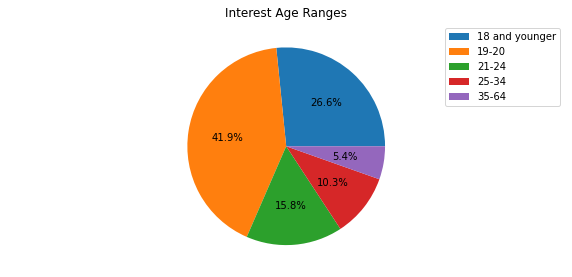

In [192]:
# What is the Age of students taking introductory literacy courses?
# This pie chart shows a breakdown of students that responded to the Literacy survey broken up by their age. 
#   It should be representative of incoming student ages taking the literacy / entry class in 2022.
fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(211) 
total = df_literacyGroupBy.groupby('Age').Interest.count()

labels = "18 and younger", "19-20", "21-24","25-34","35-64"
ax.set_title('Interest Age Ranges')
ax.axis("equal")
pie = ax.pie(total, startangle=0, autopct='%1.1f%%')
ax.legend(pie[0],labels, loc="upper right")

In [122]:
# In this cell we are just recalling the earlier operation and setting it into a new df to avoid
#   modifying the original
df_literacyStats = df_literacyStats.T
df_literacyStats

,No,Yes,Ratio-YesNo
WebDev,156.0,47.0,0.301282
CyberSec,127.0,76.0,0.598425
AppDev,151.0,52.0,0.344371
Analytics,167.0,36.0,0.215569
ML_AI,162.0,41.0,0.253086
Programming,158.0,45.0,0.284810
GameDesign,149.0,54.0,0.362416
HW_InstallRepair,165.0,38.0,0.230303


([<matplotlib.patches.Wedge at 0x7faf3188b640>,
 [Text(1.0273754275284954, 0.3930645378441579, 'WebDev'),
  Text(0.12532510147379883, 1.092837416517472, 'CyberSec'),
  Text(-0.9426252842640548, 0.5669722863298611, 'AppDev'),
  Text(-1.0896009358235244, -0.15089665553782297, 'Analytics'),
  Text(-0.8370452481515862, -0.7136912865846476, 'ML_AI'),
  Text(-0.23187663167017597, -1.0752828593841222, 'Programming'),
  Text(0.5959976989208213, -0.9245467770108153, 'GameDesign'),
  Text(1.057366761737258, -0.30327467941334146, 'HW_IntallRepair')],
 [Text(0.5603865968337247, 0.2143988388240861, '11.6%'),
  Text(0.06835914625843571, 0.5960931362822574, '23.1%'),
  Text(-0.5141592459622116, 0.3092576107253788, '13.3%'),
  Text(-0.5943277831764677, -0.08230726665699434, '8.3%'),
  Text(-0.4565701353554106, -0.3892861563188987, '9.8%'),
  Text(-0.12647816272918688, -0.5865179233004302, '11.0%'),
  Text(0.3250896539568116, -0.5042982420058992, '14.0%'),
  Text(0.5767455064021406, -0.1654225524072771

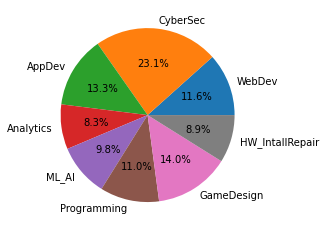

In [123]:
# What is the ratio/percent of interest per course for the literacy survey?
# This cell generates a graph of the above cell ratios. Because it is a pie chart, 
#   we can see how all the ratios relate to each other giving us a picture of class
#   popularity, where CyberSec is the highest interest course, followed by Game Design
labels = 'WebDev','CyberSec','AppDev','Analytics','ML_AI','Programming','GameDesign','HW_IntallRepair'
plt.pie(df_literacyStats['Ratio-YesNo'], labels = labels, autopct='%1.1f%%')


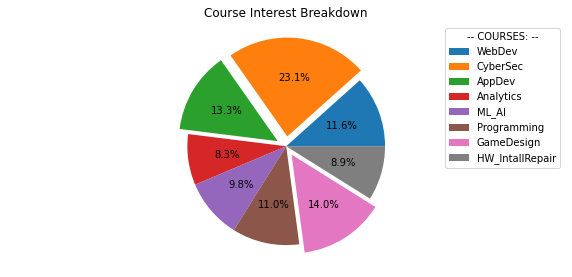

In [124]:
# Call out the top three highest ratio/percent of interest per course for the literacy survey.
# This pie chart is a retell of the above cell, but it gives us a better visual on the top three
#   courses of interest
fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(211) 
total = df_literacyStats['Ratio-YesNo']
labels = 'WebDev','CyberSec','AppDev','Analytics','ML_AI','Programming','GameDesign','HW_IntallRepair'
toexplode = [0, 0.1, 0.1, 0, 0, 0, 0.1, 0]

ax.set_title('Course Interest Breakdown')
ax.axis("equal")
pie = ax.pie(total, startangle=0, autopct='%1.1f%%', explode = toexplode,)
ax.legend(pie[0],labels, loc="upper right", title = "-- COURSES: --")

<BarContainer object of 8 artists>

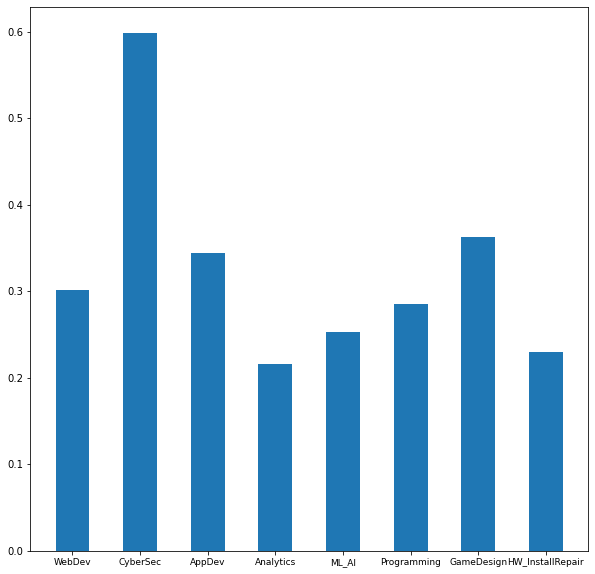

In [125]:
# This bar graph represents the same inforamtion as above, but it shows the percentages of interest
#   for each individual course
fig = plt.figure(4, figsize=(10,10))
labels = 'WebDev','CyberSec','AppDev','Analytics','ML_AI','Programming','GameDesign','HW_IntallRepair'
plt.xticks(fontsize=9)
plt.bar(df_literacyStats.index,df_literacyStats['Ratio-YesNo'], width=.5)



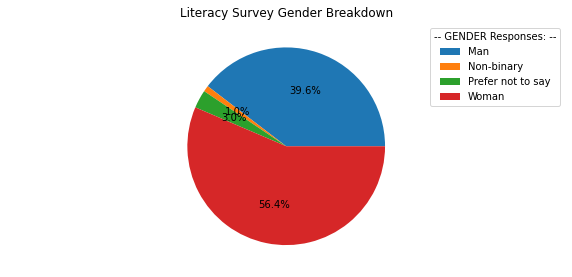

In [126]:
# What is the gender mix for students taking the literacy survey? 
# This information provides us with a starting point on who are students are, but becomes 
#    more valuable when we compare it to the tech survey.
# This cell generates a pie chart for Gender responses to the Literacy survey. 

fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(211) 
total = df_literacyGroupBy.groupby('Gender').Interest.count()
labels = 'Man', 'Non-binary', 'Prefer not to say', 'Woman'
toexplode = [0, 0, 0, 0]

ax.set_title('Literacy Survey Gender Breakdown')
ax.axis("equal")
pie = ax.pie(total, startangle=0, autopct='%1.1f%%', explode = toexplode,)
ax.legend(pie[0],labels, loc="upper right", title = "-- GENDER Responses: --")

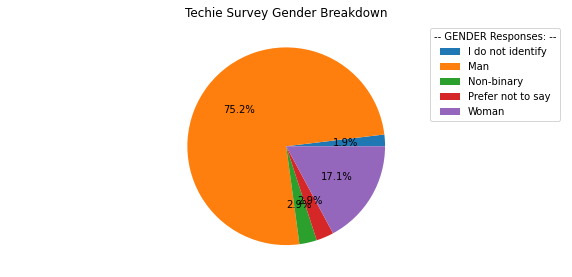

In [127]:
# What is the gender mix for students taking the tech survey? 
# This cell generates a pie chart for Gender responses to the Tech Survey

fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(211) 
total = df_techiesGroupBy.groupby('Gender').Interest.count()
labels = 'I do not identify', 'Man', 'Non-binary', 'Prefer not to say', 'Woman'
toexplode = [0, 0, 0, 0, 0]

ax.set_title('Techie Survey Gender Breakdown')
ax.axis("equal")
pie = ax.pie(total, startangle=0, autopct='%1.1f%%', explode = toexplode,)
ax.legend(pie[0],labels, loc="upper right", title = "-- GENDER Responses: --")

In [128]:
# What is the gender representation for computer classes compares to what we know of the 
#    entry level population? (These are the people thatmore likely to take computer classes).
# A comparison of the two graphs (literacy vs. tech) tells an insteresting picture:
#   The literacy survey shows a high ratin of women to other responsers, surpasing even men
#     but the techies survey for those students actively interested in tech shows only a 17%
#     female response
df_techiesGroupBy.groupby('Age').Interest.count()

Age
18 and younger    46
19-20             27
21-24             17
25-34              9
35-64              4
65+                2
Name: Interest, dtype: int64

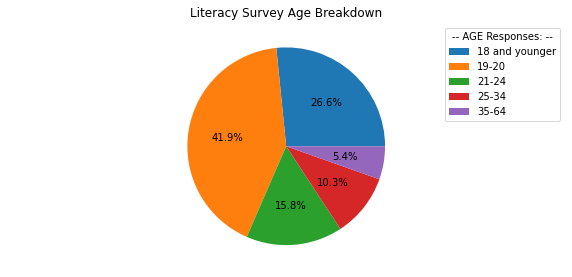

In [185]:
# This cell generates a pie chart for Age responses to the Literacy survey. 

fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(211) 
total = df_literacyGroupBy.groupby('Age').Interest.count()
labels = '18 and younger', '19-20', '21-24', '25-34', '35-64'
toexplode = [0, 0, 0, 0, 0]

ax.set_title('Literacy Survey Age Breakdown')
ax.axis("equal")
pie = ax.pie(total, startangle=0, autopct='%1.1f%%', explode = toexplode,)
ax.legend(pie[0],labels, loc="upper right", title = "-- AGE Responses: --")

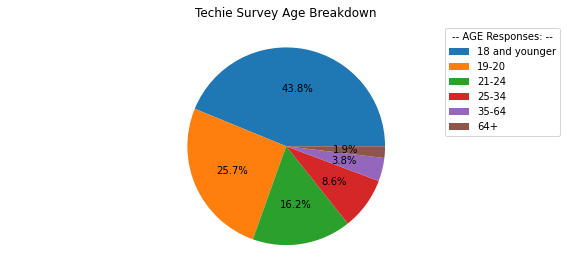

In [193]:
# What is the age represenation in the tech survey? 
# This cell generates a pie chart for Age responses to the Techies Survey

fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(211) 
total = df_techiesGroupBy.groupby('Age').Interest.count()
labels = '18 and younger', '19-20', '21-24', '25-34', '35-64', '64+'
toexplode = [0, 0, 0, 0, 0, 0]

ax.set_title('Techie Survey Age Breakdown')
ax.axis("equal")
pie = ax.pie(total, startangle=0, autopct='%1.1f%%', explode = toexplode,)
ax.legend(pie[0],labels, loc="upper right", title = "-- AGE Responses: --")